In [ ]:
# install software library rubberband sebagai tools pintch shifting dan stretch audio
!apt-get install rubberband-cli
# install python libary sebagai wrapper rubberband (karena itu library c++)
!pip install pyrubberband

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  rubberband-cli
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 87.5 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 rubberband-cli amd64 2.0.0-2 [87.5 kB]
Fetched 87.5 kB in 1s (86.1 kB/s)
Selecting previously unselected package rubberband-cli.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../rubberband-cli_2.0.0-2_amd64.deb ...
Unpacking rubberband-cli (2.0.0-2) ...
Setting up rubberband-cli (2.0.0-2) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import os
import glob
import librosa
import pyrubberband as pyrb
import soundfile as sf
import matplotlib.pyplot as plt

In [ ]:
#registrasi path drive ke notebook colab
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/Colab Notebooks/Skripsi')

Mounted at /content/drive


In [ ]:
print(glob.glob("*.wav"))

['ikhfa.wav', 'idzhar.wav', 'idgham.wav', 'iqlab.wav']


#testing

In [ ]:
def strech_pintch_data():
    # listin all audio files di dir sekarang
    files = glob.glob("*.wav")

    stretch_signal = []
    shift_signal = []
    stretch_shift_signal = []
    # tiap file, dengan librosa ambil sampling & sample rate
    for file in files:
        new_name = file.split(".")[0]
        y, sr = librosa.load(file)

        # stretch durasi & pitch shifting
        stretch_signal = pyrb.time_stretch(y, sr, 0.85)
        sf.write(os.path.join(new_name +"_stretch.wav"),
                                 stretch_signal,
                                 sr)
        print(" Berhasil buat {} menjadi {}_stretch.wav".format(file, new_name))

        shift_signal = pyrb.pitch_shift(y, sr, 1.5)
        sf.write(os.path.join(new_name +"_shift.wav"),
                                 shift_signal,
                                 sr)
        print("Berhasil buat {} menjadi {}_shift.wav".format(file, new_name))

        stretch_shift_signal = pyrb.pitch_shift(stretch_signal, sr, 1.5)
        sf.write(os.path.join(new_name +"_stretch_shift.wav"),
                                 stretch_shift_signal,
                                 sr)
        print("Berhasil buat {} menjadi {}_stretch_shift.wav\n".format(file, new_name))

In [ ]:
strech_pintch_data()

Berhasil simpan ikhfa.wav menjadi ikhfa_stretch.wav
Berhasil simpan ikhfa.wav menjadi ikhfa_shifted.wav
Berhasil simpan idzhar.wav menjadi idzhar_stretch.wav
Berhasil simpan idzhar.wav menjadi idzhar_shifted.wav
Berhasil simpan idgham.wav menjadi idgham_stretch.wav
Berhasil simpan idgham.wav menjadi idgham_shifted.wav
Berhasil simpan iqlab.wav menjadi iqlab_stretch.wav
Berhasil simpan iqlab.wav menjadi iqlab_shifted.wav


#hasil testing

In [ ]:
ikhfa, sr = librosa.load("ikhfa.wav")
ikhfa_st, _ = librosa.load("ikhfa_stretch.wav")
ikhfa_sh, _ = librosa.load("ikhfashift.wav")

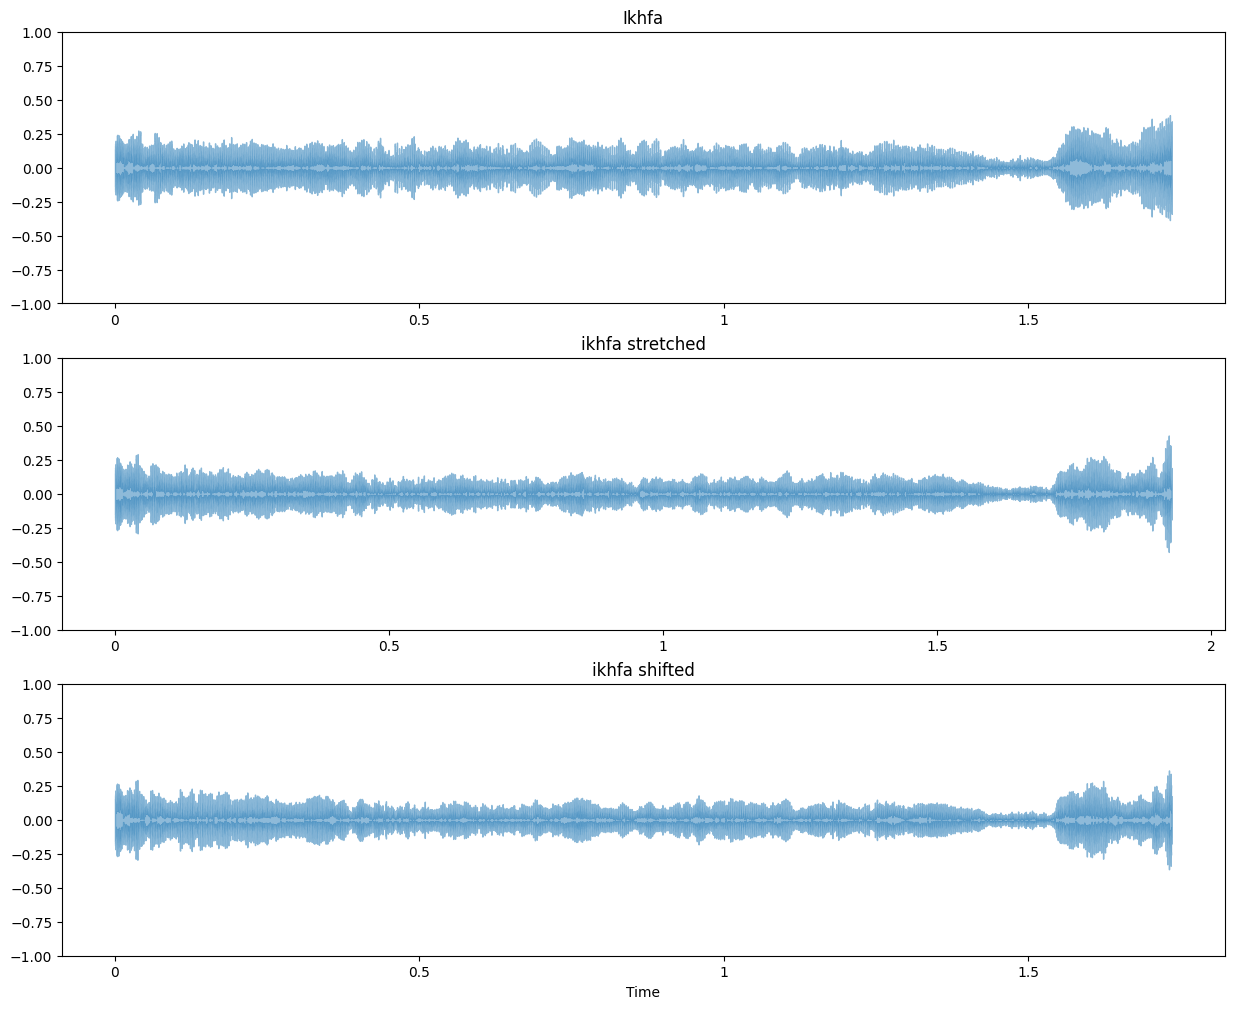

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
librosa.display.waveshow(ikhfa, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("Ikhfa")

plt.subplot(3, 1, 2)
librosa.display.waveshow(ikhfa_st, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("")
plt.title("ikhfa stretched")

plt.subplot(3, 1, 3)
librosa.display.waveshow(ikhfa_sh, alpha=0.5)
plt.ylim((-1, 1))
plt.xlabel("Time")
plt.title("ikhfa shifted")

plt.show()

#Duplikasi audio panjangin & dilebarkan
###Diperpanjang 15% dan naikin pintch 25% khusus iqlab di lokasi asli, panjang 25% dan turun 50% untuk sisanya

In [ ]:
def strech_pintch_data(data_path, stretch_num=0.75, shift_num=-0.75, max=None):
    # listin all audio files di dir data_path
    files = glob.glob(os.path.join(data_path, "*.wav"))

    # kalau max g didefinisikan
    if max == None:
      max = len(files)

    stretch_signal = []
    shift_signal = []
    stretch_shift_signal = []

    '''Tiap file, load with librosa,
       edit with rubberband, then save the files'''
    for i, (file) in enumerate(files):
        # end when limited (total file max * 3)
        if i >= max:
          break

        new_name = file.split("/")[-1]
        new_name = new_name.split(".")[0]
        y, sr = librosa.load(file)

        print("Iterasi ke-{}".format(i+1))
        stretch_signal = pyrb.time_stretch(y, sr, stretch_num)
        sf.write(os.path.join(data_path, new_name +"_stretch.wav"),
                                 stretch_signal,
                                 sr)
        print("Berhasil buat {} menjadi {}_stretch.wav".format(new_name, new_name))

        shift_signal = pyrb.pitch_shift(y, sr, shift_num)
        sf.write(os.path.join(data_path, new_name +"_shift.wav"),
                                 shift_signal,
                                 sr)
        print("Berhasil buat {} menjadi {}_shift.wav".format(new_name, new_name))

        stretch_shift_signal = pyrb.pitch_shift(stretch_signal, sr, shift_num)
        sf.write(os.path.join(data_path, new_name +"_stretch_shift.wav"),
                                 stretch_shift_signal,
                                 sr)
        print("Berhasil buat {} menjadi {}_stretch_shift.wav\n".format(new_name, new_name))\


##kalkulasi

In [ ]:
strech_pintch_data("data/Iqlab", 0.85, 1.25)

 Berhasil buat data/Iqlab/291_3_8_2_2_99_15.wav menjadi 291_3_8_2_2_99_15_stretch.wav
Berhasil buat data/Iqlab/291_3_8_2_2_99_15.wav menjadi 291_3_8_2_2_99_15_shift.wav
Berhasil buat data/Iqlab/291_3_8_2_2_99_15.wav menjadi 291_3_8_2_2_99_15_stretch_shift.wav

 Berhasil buat data/Iqlab/18_3_6_2_2_10_3.wav menjadi 18_3_6_2_2_10_3_stretch.wav
Berhasil buat data/Iqlab/18_3_6_2_2_10_3.wav menjadi 18_3_6_2_2_10_3_shift.wav
Berhasil buat data/Iqlab/18_3_6_2_2_10_3.wav menjadi 18_3_6_2_2_10_3_stretch_shift.wav

 Berhasil buat data/Iqlab/63_3_5_2_2_27_5.wav menjadi 63_3_5_2_2_27_5_stretch.wav
Berhasil buat data/Iqlab/63_3_5_2_2_27_5.wav menjadi 63_3_5_2_2_27_5_shift.wav
Berhasil buat data/Iqlab/63_3_5_2_2_27_5.wav menjadi 63_3_5_2_2_27_5_stretch_shift.wav

 Berhasil buat data/Iqlab/73_3_5_2_2_31_6.wav menjadi 73_3_5_2_2_31_6_stretch.wav
Berhasil buat data/Iqlab/73_3_5_2_2_31_6.wav menjadi 73_3_5_2_2_31_6_shift.wav
Berhasil buat data/Iqlab/73_3_5_2_2_31_6.wav menjadi 73_3_5_2_2_31_6_stretch_shi

In [ ]:
strech_pintch_data("nambah_data/idzhar")

Berhasil buat Abdurrahman_Suddais_idzhar_1 menjadi Abdurrahman_Suddais_idzhar_1_stretch.wav
Berhasil buat Abdurrahman_Suddais_idzhar_1 menjadi Abdurrahman_Suddais_idzhar_1_shift.wav
Berhasil buat Abdurrahman_Suddais_idzhar_1 menjadi Abdurrahman_Suddais_idzhar_1_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_idzhar_2 menjadi Abdurrahman_Suddais_idzhar_2_stretch.wav
Berhasil buat Abdurrahman_Suddais_idzhar_2 menjadi Abdurrahman_Suddais_idzhar_2_shift.wav
Berhasil buat Abdurrahman_Suddais_idzhar_2 menjadi Abdurrahman_Suddais_idzhar_2_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_idzhar_3 menjadi Abdurrahman_Suddais_idzhar_3_stretch.wav
Berhasil buat Abdurrahman_Suddais_idzhar_3 menjadi Abdurrahman_Suddais_idzhar_3_shift.wav
Berhasil buat Abdurrahman_Suddais_idzhar_3 menjadi Abdurrahman_Suddais_idzhar_3_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_idzhar_4 menjadi Abdurrahman_Suddais_idzhar_4_stretch.wav
Berhasil buat Abdurrahman_Suddais_idzhar_4 menjadi Abdurrahman_Su

In [ ]:
strech_pintch_data("nambah_data/ikhfa")

Berhasil buat Abdurrahman_Suddais_ikhfa_1 menjadi Abdurrahman_Suddais_ikhfa_1_stretch.wav
Berhasil buat Abdurrahman_Suddais_ikhfa_1 menjadi Abdurrahman_Suddais_ikhfa_1_shift.wav
Berhasil buat Abdurrahman_Suddais_ikhfa_1 menjadi Abdurrahman_Suddais_ikhfa_1_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_ikhfa_2 menjadi Abdurrahman_Suddais_ikhfa_2_stretch.wav
Berhasil buat Abdurrahman_Suddais_ikhfa_2 menjadi Abdurrahman_Suddais_ikhfa_2_shift.wav
Berhasil buat Abdurrahman_Suddais_ikhfa_2 menjadi Abdurrahman_Suddais_ikhfa_2_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_ikhfa_3 menjadi Abdurrahman_Suddais_ikhfa_3_stretch.wav
Berhasil buat Abdurrahman_Suddais_ikhfa_3 menjadi Abdurrahman_Suddais_ikhfa_3_shift.wav
Berhasil buat Abdurrahman_Suddais_ikhfa_3 menjadi Abdurrahman_Suddais_ikhfa_3_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_ikhfa_4 menjadi Abdurrahman_Suddais_ikhfa_4_stretch.wav
Berhasil buat Abdurrahman_Suddais_ikhfa_4 menjadi Abdurrahman_Suddais_ikhfa_4_shift.w

In [ ]:
strech_pintch_data("nambah_data/idghom")

Berhasil buat Abdurrahman_Suddais_idghom_1 menjadi Abdurrahman_Suddais_idghom_1_stretch.wav
Berhasil buat Abdurrahman_Suddais_idghom_1 menjadi Abdurrahman_Suddais_idghom_1_shift.wav
Berhasil buat Abdurrahman_Suddais_idghom_1 menjadi Abdurrahman_Suddais_idghom_1_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_idghom_2 menjadi Abdurrahman_Suddais_idghom_2_stretch.wav
Berhasil buat Abdurrahman_Suddais_idghom_2 menjadi Abdurrahman_Suddais_idghom_2_shift.wav
Berhasil buat Abdurrahman_Suddais_idghom_2 menjadi Abdurrahman_Suddais_idghom_2_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_idghom_3 menjadi Abdurrahman_Suddais_idghom_3_stretch.wav
Berhasil buat Abdurrahman_Suddais_idghom_3 menjadi Abdurrahman_Suddais_idghom_3_shift.wav
Berhasil buat Abdurrahman_Suddais_idghom_3 menjadi Abdurrahman_Suddais_idghom_3_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_idghom_4 menjadi Abdurrahman_Suddais_idghom_4_stretch.wav
Berhasil buat Abdurrahman_Suddais_idghom_4 menjadi Abdurrahman_Su

In [ ]:
strech_pintch_data("nambah_data/iqlab")

Berhasil buat Abdurrahman_Suddais_iqlab_1 menjadi Abdurrahman_Suddais_iqlab_1_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_1 menjadi Abdurrahman_Suddais_iqlab_1_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_1 menjadi Abdurrahman_Suddais_iqlab_1_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_iqlab_2 menjadi Abdurrahman_Suddais_iqlab_2_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_2 menjadi Abdurrahman_Suddais_iqlab_2_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_2 menjadi Abdurrahman_Suddais_iqlab_2_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_iqlab_3 menjadi Abdurrahman_Suddais_iqlab_3_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_3 menjadi Abdurrahman_Suddais_iqlab_3_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_3 menjadi Abdurrahman_Suddais_iqlab_3_stretch_shift.wav

Berhasil buat Abdurrahman_Suddais_iqlab_4 menjadi Abdurrahman_Suddais_iqlab_4_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_4 menjadi Abdurrahman_Suddais_iqlab_4_shift.w

In [ ]:
strech_pintch_data("nambah_data/iqlab")

Berhasil buat Abdurrahman_Suddais_iqlab_1 menjadi Abdurrahman_Suddais_iqlab_1_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_1 menjadi Abdurrahman_Suddais_iqlab_1_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_2 menjadi Abdurrahman_Suddais_iqlab_2_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_2 menjadi Abdurrahman_Suddais_iqlab_2_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_3 menjadi Abdurrahman_Suddais_iqlab_3_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_3 menjadi Abdurrahman_Suddais_iqlab_3_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_4 menjadi Abdurrahman_Suddais_iqlab_4_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_4 menjadi Abdurrahman_Suddais_iqlab_4_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_5 menjadi Abdurrahman_Suddais_iqlab_5_stretch.wav
Berhasil buat Abdurrahman_Suddais_iqlab_5 menjadi Abdurrahman_Suddais_iqlab_5_shift.wav
Berhasil buat Abdurrahman_Suddais_iqlab_6 menjadi Abdurrahman_Suddais_iqlab_6_stretch.wav
Berhasil buat Abdurr

In [ ]:
strech_pintch_data("data/Ikhfa", 0.95, 1.5, 15)

Iterasi ke-1
Berhasil buat 2_2_5_20_2_3_2 menjadi 2_2_5_20_2_3_2_stretch.wav
Berhasil buat 2_2_5_20_2_3_2 menjadi 2_2_5_20_2_3_2_shift.wav
Berhasil buat 2_2_5_20_2_3_2 menjadi 2_2_5_20_2_3_2_stretch_shift.wav

Iterasi ke-2
Berhasil buat 3_2_5_11_2_4_2 menjadi 3_2_5_11_2_4_2_stretch.wav
Berhasil buat 3_2_5_11_2_4_2 menjadi 3_2_5_11_2_4_2_shift.wav
Berhasil buat 3_2_5_11_2_4_2 menjadi 3_2_5_11_2_4_2_stretch_shift.wav

Iterasi ke-3
Berhasil buat 4_2_5_11_2_4_2 menjadi 4_2_5_11_2_4_2_stretch.wav
Berhasil buat 4_2_5_11_2_4_2 menjadi 4_2_5_11_2_4_2_shift.wav
Berhasil buat 4_2_5_11_2_4_2 menjadi 4_2_5_11_2_4_2_stretch_shift.wav

Iterasi ke-4
Berhasil buat 5_2_5_21_2_4_2 menjadi 5_2_5_21_2_4_2_stretch.wav
Berhasil buat 5_2_5_21_2_4_2 menjadi 5_2_5_21_2_4_2_shift.wav
Berhasil buat 5_2_5_21_2_4_2 menjadi 5_2_5_21_2_4_2_stretch_shift.wav

Iterasi ke-5
Berhasil buat 9_2_5_9_2_6_3 menjadi 9_2_5_9_2_6_3_stretch.wav
Berhasil buat 9_2_5_9_2_6_3 menjadi 9_2_5_9_2_6_3_shift.wav
Berhasil buat 9_2_5_9_2_6

In [ ]:
strech_pintch_data("data/Idzhar", 0.85, 1.5, 16)

Iterasi ke-1
Berhasil buat 8_4_6_18_2_6_3 menjadi 8_4_6_18_2_6_3_stretch.wav
Berhasil buat 8_4_6_18_2_6_3 menjadi 8_4_6_18_2_6_3_shift.wav
Berhasil buat 8_4_6_18_2_6_3 menjadi 8_4_6_18_2_6_3_stretch_shift.wav

Iterasi ke-2
Berhasil buat 12_4_6_18_2_7_3 menjadi 12_4_6_18_2_7_3_stretch.wav
Berhasil buat 12_4_6_18_2_7_3 menjadi 12_4_6_18_2_7_3_shift.wav
Berhasil buat 12_4_6_18_2_7_3 menjadi 12_4_6_18_2_7_3_stretch_shift.wav

Iterasi ke-3
Berhasil buat 17_4_6_1_2_10_3 menjadi 17_4_6_1_2_10_3_stretch.wav
Berhasil buat 17_4_6_1_2_10_3 menjadi 17_4_6_1_2_10_3_shift.wav
Berhasil buat 17_4_6_1_2_10_3 menjadi 17_4_6_1_2_10_3_stretch_shift.wav

Iterasi ke-4
Berhasil buat 48_4_5_27_2_25_5 menjadi 48_4_5_27_2_25_5_stretch.wav
Berhasil buat 48_4_5_27_2_25_5 menjadi 48_4_5_27_2_25_5_shift.wav
Berhasil buat 48_4_5_27_2_25_5 menjadi 48_4_5_27_2_25_5_stretch_shift.wav

Iterasi ke-5
Berhasil buat 69_4_8_18_2_29_5 menjadi 69_4_8_18_2_29_5_stretch.wav
Berhasil buat 69_4_8_18_2_29_5 menjadi 69_4_8_18_2_29_5

#counting up

In [ ]:
print("total ikhfa {}".format(len(glob.glob("data/Ikhfa/*.wav"))))
print("total idghom {}".format(len(glob.glob("data/Idghom/*.wav"))))
print("total idzhar {}".format(len(glob.glob("data/Idzhar/*.wav"))))
print("total iqlab {}".format(len(glob.glob("data/Iqlab/*.wav"))))

total ikhfa 127
total idghom 105
total idzhar 61
total iqlab 72


In [ ]:
print("total ikhfa {}".format(len(glob.glob("nambah_data/ikhfa/*.wav"))))
print("total idghom {}".format(len(glob.glob("nambah_data/idghom/*.wav"))))
print("total idzhar {}".format(len(glob.glob("nambah_data/idzhar/*.wav"))))
print("total iqlab {}".format(len(glob.glob("nambah_data/iqlab/*.wav"))))

total ikhfa 40
total idghom 108
total idzhar 96
total iqlab 126


In [ ]:
print("total ikhfa {}".format(len(glob.glob("nambah_data/ikhfa/*.wav"))+len(glob.glob("data/Ikhfa/*.wav"))))
print("total idghom {}".format(len(glob.glob("nambah_data/idghom/*.wav"))+len(glob.glob("data/Idghom/*.wav"))))
print("total idzhar {}".format(len(glob.glob("nambah_data/idzhar/*.wav"))+len(glob.glob("data/Idzhar/*.wav"))))
print("total iqlab {}".format(len(glob.glob("nambah_data/iqlab/*.wav"))+len(glob.glob("data/Iqlab/*.wav"))))

total ikhfa 167
total idghom 213
total idzhar 157
total iqlab 198


In [ ]:
print("total ikhfa {}".format(len(glob.glob("nambah_data/ikhfa/*.wav"))+len(glob.glob("data/Ikhfa/*.wav"))))
print("total idghom {}".format(len(glob.glob("nambah_data/idghom/*.wav"))+len(glob.glob("data/Idghom/*.wav"))))
print("total idzhar {}".format(len(glob.glob("nambah_data/idzhar/*.wav"))+len(glob.glob("data/Idzhar/*.wav"))))
print("total iqlab {}".format(len(glob.glob("nambah_data/iqlab/*.wav"))+len(glob.glob("data/Iqlab/*.wav"))))

total ikhfa 212
total idghom 213
total idzhar 205
total iqlab 198


In [ ]:
print("total ikhfa {}".format(len(glob.glob("data/Ikhfa/*.wav"))))
print("total idghom {}".format(len(glob.glob("data/Idghom/*.wav"))))
print("total idzhar {}".format(len(glob.glob("data/Idzhar/*.wav"))))
print("total iqlab {}".format(len(glob.glob("data/Iqlab/*.wav"))))

total ikhfa 212
total idghom 213
total idzhar 205
total iqlab 198
